In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import json
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def accuracy(real, pred):
  pred=[round(x) for x in pred]
  pred=[1 if x<1 else x for x in pred]
  pred=[4 if x>4 else x for x in pred]
  s=np.sum(pred == real)
  return s/len(pred)

In [3]:
data  = []
with open("/content/drive/MyDrive/Colab Notebooks/apt/word2vec_without_numbers.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

print(without_numbers.head(1))

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]
max_acc=0.0
for tr in train:
  print("new train iteration:")
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  for gamma in range(1, 11, 1):
    model = SVR(kernel = 'rbf', gamma=(gamma/10)).fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(MAE(y_test, prediction), MSE(y_test, prediction))
    print(accuracy(y_test, prediction))
    if(accuracy(y_test, prediction)>max_acc):
      max_acc = accuracy(y_test, prediction)
      parameters= gamma/10
      best_model=model
      train_data=tr
print("best result: ",parameters, max_acc, MSE(y_test, best_model.predict(X_test)))

   id                                       query_vector  \
0   1  [-0.067871094, 0.122558594, -0.17480469, 0.086...   

                                      product_vector  median_relevance  \
0  [0.010758463, 0.015542602, 0.008837891, 0.0595...                 1   

   relevance_variance  
0                 0.0  
new train iteration:
0.5738213720826679 0.7343900748910879
0.5957185039370079
0.5604440068185816 0.685287178682704
0.6067913385826772
0.5574798716782017 0.6603488043621656
0.609251968503937
0.5591204050563728 0.6476722742685802
0.6040846456692913
0.5622316370091345 0.6398264702345314
0.5981791338582677
0.5660152568066534 0.6348352165379293
0.5967027559055118
0.570136554483622 0.6322060307659177
0.5922736220472441
0.5742368524391138 0.6312132933784808
0.5878444881889764
0.5783909410926864 0.631720513938436
0.5826771653543307
0.5825643154335562 0.6332976118233661
0.5792322834645669
best result:  0.3 0.609251968503937 0.6603488043621656


   id                                       query_vector  \
0   1  [-0.067871094, 0.122558594, -0.17480469, 0.086...   

                                      product_vector  median_relevance  \
0  [0.010758463, 0.015542602, 0.008837891, 0.0595...                 1   

   relevance_variance  
0                 0.0  
0.5738213720826679 0.7343900748910879
0.5957185039370079
0.5604440068185816 0.685287178682704
0.6067913385826772
0.5574798716782017 0.6603488043621656
0.609251968503937
0.5591204050563728 0.6476722742685802
0.6040846456692913
0.5622316370091345 0.6398264702345314
0.5981791338582677
0.5660152568066534 0.6348352165379293
0.5967027559055118
0.570136554483622 0.6322060307659177
0.5922736220472441
0.5742368524391138 0.6312132933784808
0.5878444881889764
0.5783909410926864 0.631720513938436
0.5826771653543307
0.5825643154335562 0.6332976118233661
0.5792322834645669
best result:  0.3 0.609251968503937


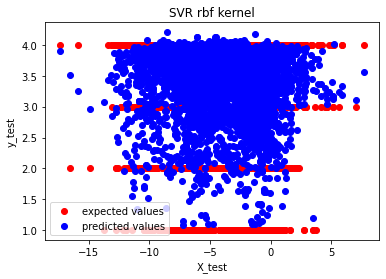

In [4]:
import matplotlib.pyplot as plt

data  = []
with open("/content/drive/MyDrive/Colab Notebooks/apt/word2vec_without_numbers.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

print(without_numbers.head(1))

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]
max_acc=0.0
X_train, X_test, y_train, y_test = train_test_split(train[0], label, test_size=0.4, random_state=42)
for gamma in range(1, 11, 1):
    model = SVR(kernel = 'rbf', gamma=(gamma/10)).fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(MAE(y_test, prediction), MSE(y_test, prediction))
    print(accuracy(y_test, prediction))
    if(accuracy(y_test, prediction)>max_acc):
      max_acc = accuracy(y_test, prediction)
      parameters= gamma/10
      best_model=model
      train_data=tr
print("best result: ",parameters, max_acc)

X_grid = np.arange(min(np.sum(X_test, axis=1)), max(np.sum(X_test, axis=1)), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(np.sum(X_test, axis=1), y_test, color = 'red', label='expected values')
plt.scatter(np.sum(X_test, axis=1), model.predict(X_test), color = 'blue', label='predicted values')
plt.title('SVR rbf kernel')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend(loc="best")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/apt/svr_rbf.jpg', bbox_inches='tight')
plt.show()

In [5]:
data  = []
with open("/content/drive/MyDrive/Colab Notebooks/apt/word2vec_with_numbers.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

print(without_numbers.head(1))

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]
max_acc=0.0
for tr in train:
  print("new train iteration:")
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  for gamma in range(1, 11, 1):
    model = SVR(kernel = 'rbf', gamma=(gamma/10)).fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(MAE(y_test, prediction), MSE(y_test, prediction))
    print(accuracy(y_test, prediction))
    if(accuracy(y_test, prediction)>max_acc):
      max_acc = accuracy(y_test, prediction)
      parameters= gamma/10
      best_model=model
      train_data=tr
print("best result: ",parameters, max_acc, MSE(y_test, best_model.predict(X_test)))

   id                                       query_vector  \
0   1  [-0.067871094, 0.122558594, -0.17480469, 0.086...   

                                      product_vector  median_relevance  \
0  [0.024543313, 0.0071653477, 0.011876724, 0.059...                 1   

   relevance_variance  
0                 0.0  
new train iteration:
0.5739105562832785 0.7352290656711269
0.59498031496063
0.5604732088283585 0.686793236684134
0.6065452755905512
0.5576703421473099 0.662138583148285
0.6070374015748031
0.5590541440819916 0.6492197342009415
0.6060531496062992
0.561975188403318 0.6408176041127297
0.5996555118110236
0.56550516747428 0.6355995348848049
0.5959645669291339
0.5692649011294971 0.6322921232813543
0.593011811023622
0.5732168612866632 0.6308917706255975
0.5880905511811023
0.5772891539014661 0.630922495002422
0.5846456692913385
0.581278685883145 0.631986775448077
0.5816929133858267
best result:  0.3 0.6070374015748031 0.662138583148285


In [6]:
data  = []
with open("/content/drive/MyDrive/Colab Notebooks/apt/word2vec_without_numbers_partially.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

print(without_numbers.head(1))

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]
max_acc=0.0
for tr in train:
  print("new train iteration:")
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  for gamma in range(1, 11, 1):
    model = SVR(kernel = 'rbf', gamma=(gamma/10)).fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(MAE(y_test, prediction), MSE(y_test, prediction))
    print(accuracy(y_test, prediction))
    if(accuracy(y_test, prediction)>max_acc):
      max_acc = accuracy(y_test, prediction)
      parameters= gamma/10
      best_model=model
      train_data=tr
print("best result: ",parameters, max_acc, MSE(y_test, best_model.predict(X_test)))

   id                                       query_vector  \
0   1  [-0.067871094, 0.122558594, -0.17480469, 0.086...   

                                      product_vector  median_relevance  \
0  [0.010758463, 0.015542602, 0.008837891, 0.0595...                 1   

   relevance_variance  
0                 0.0  
new train iteration:
0.5735615394881712 0.7337701086881685
0.594242125984252
0.5601061472641632 0.6851219464597794
0.6077755905511811
0.5573398029354054 0.6604776454873414
0.609005905511811
0.5589373578692481 0.6475660792368756
0.6043307086614174
0.5621797695092181 0.639670279959863
0.5986712598425197
0.5660117010187234 0.6347941283466165
0.5981791338582677
0.5701142026906978 0.6320671374112072
0.59375
0.5742281483346914 0.6310214147410073
0.5885826771653543
0.57837201690489 0.6314317635967945
0.5836614173228346
0.5825600524623711 0.632970879334642
0.5802165354330708
best result:  0.3 0.609005905511811 0.6604776454873414


In [7]:
data  = []
with open("/content/drive/MyDrive/Colab Notebooks/apt/fasttext_without_numbers.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

print(without_numbers.head(1))

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]
max_acc=0.0
for tr in train:
  print("new train iteration:")
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  for gamma in range(1, 11, 1):
    model = SVR(kernel = 'rbf', gamma=(gamma/10)).fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(MAE(y_test, prediction), MSE(y_test, prediction))
    print(accuracy(y_test, prediction))
    if(accuracy(y_test, prediction)>max_acc):
      max_acc = accuracy(y_test, prediction)
      parameters= gamma/10
      best_model=model
      train_data=tr
print("best result: ",parameters, max_acc, MSE(y_test, best_model.predict(X_test)))

   id                                       query_vector  \
0   1  [0.012943572, 0.015888123, -0.025562584, 0.090...   

                                      product_vector  median_relevance  \
0  [-0.0061351587, -0.023503311, 0.06992354, 0.06...                 1   

   relevance_variance  
0                 0.0  
new train iteration:
0.6131389271579151 0.8500387611814321
0.5807086614173228
0.5908737299253823 0.7925759315704805
0.5834153543307087
0.5783473176847657 0.7572971401847491
0.5893208661417323
0.5717008599317369 0.7370017061919705
0.5954724409448819
0.5675668606912633 0.7231328733127896
0.5986712598425197
0.5648001728836332 0.7108799362227575
0.6016240157480315
0.5630220674279481 0.7018932454310346
0.6035925196850394
0.5619891722524578 0.6944073780528729
0.6060531496062992
0.5610293482898675 0.6877115260412657
0.6080216535433071
0.5606641652532824 0.6821542247324692
0.6055610236220472
best result:  0.9 0.6080216535433071 0.6877115260412657


In [8]:
data  = []
with open("/content/drive/MyDrive/Colab Notebooks/apt/fasttext_with_numbers.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

print(without_numbers.head(1))

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]
max_acc=0.0
for tr in train:
  print("new train iteration:")
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  for gamma in range(1, 11, 1):
    model = SVR(kernel = 'rbf', gamma=(gamma/10)).fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(MAE(y_test, prediction), MSE(y_test, prediction))
    print(accuracy(y_test, prediction))
    if(accuracy(y_test, prediction)>max_acc):
      max_acc = accuracy(y_test, prediction)
      parameters= gamma/10
      best_model=model
      train_data=tr
print("best result: ",parameters, max_acc, MSE(y_test, best_model.predict(X_test)))

   id                                       query_vector  \
0   1  [0.012943572, 0.015888123, -0.025562584, 0.090...   

                                      product_vector  median_relevance  \
0  [-0.0042361375, 0.008490032, 0.07483778, 0.015...                 1   

   relevance_variance  
0                 0.0  
new train iteration:
0.6131853489561543 0.8520396516443101
0.578986220472441
0.590558970846202 0.7930567202979306
0.5834153543307087
0.5787194282801255 0.7587282751405969
0.5893208661417323
0.5719488503038762 0.7388760480658304
0.5991633858267716
0.5682850692842693 0.7251587310230893
0.5989173228346457
0.5653019977096231 0.7127559171807557
0.5991633858267716
0.5633172290195199 0.702195593536363
0.6026082677165354
0.5622772976015002 0.694092760808623
0.6045767716535433
0.5614996128626802 0.686684322647215
0.6026082677165354
0.5612227618324139 0.680892469848766
0.6013779527559056
best result:  0.8 0.6045767716535433 0.694092760808623


In [9]:
data  = []
with open("/content/drive/MyDrive/Colab Notebooks/apt/fasttext_without_numbers_partially.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

print(without_numbers.head(1))

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]
max_acc=0.0
for tr in train:
  print("new train iteration:")
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  for gamma in range(1, 11, 1):
    model = SVR(kernel = 'rbf', gamma=(gamma/10)).fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(MAE(y_test, prediction), MSE(y_test, prediction))
    print(accuracy(y_test, prediction))
    if(accuracy(y_test, prediction)>max_acc):
      max_acc = accuracy(y_test, prediction)
      parameters= gamma/10
      best_model=model
      train_data=tr
print("best result: ",parameters, max_acc, MSE(y_test, best_model.predict(X_test)))

   id                                       query_vector  \
0   1  [0.012943572, 0.015888123, -0.025562584, 0.090...   

                                      product_vector  median_relevance  \
0  [-0.0061351587, -0.023503311, 0.06992354, 0.06...                 1   

   relevance_variance  
0                 0.0  
new train iteration:
0.6131116139551669 0.8514193723217042
0.5799704724409449
0.5905872139773847 0.7931712812454407
0.5836614173228346
0.5782308563537761 0.7605667967872582
0.5917814960629921
0.5717397812067674 0.7404172495775785
0.5967027559055118
0.5679882798507043 0.7268730425535797
0.5996555118110236
0.5652505201504929 0.7149805775775632
0.6028543307086615
0.5634839923221407 0.7054655843562306
0.6040846456692913
0.5621914433634132 0.6972206157300213
0.6065452755905512
0.5612285874869598 0.6899437714547337
0.6070374015748031
0.560783677536075 0.683555007072013
0.6065452755905512
best result:  0.9 0.6070374015748031 0.6899437714547337


In [10]:
from sklearn.dummy import DummyRegressor
with open("/content/drive/MyDrive/Colab Notebooks/apt/word2vec_without_numbers.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]

for tr in train:
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  dummy_regr = DummyRegressor(strategy="median")
  dummy_regr.fit(X_train, y_train)
  pred=dummy_regr.predict(X_test)
  print(MAE(y_test, pred), MSE(y_test, pred))
  print(accuracy(y_test, prediction))

0.6865157480314961 1.437007874015748
0.6065452755905512


In [11]:
with open("/content/drive/MyDrive/Colab Notebooks/apt/word2vec_with_numbers.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]

for tr in train:
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  dummy_regr = DummyRegressor(strategy="median")
  dummy_regr.fit(X_train, y_train)
  pred=dummy_regr.predict(X_test)
  print(MAE(y_test, pred), MSE(y_test, pred))
  print(accuracy(y_test, prediction))

0.6865157480314961 1.437007874015748
0.6065452755905512


In [12]:
with open("/content/drive/MyDrive/Colab Notebooks/apt/word2vec_without_numbers_partially.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]

for tr in train:
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  dummy_regr = DummyRegressor(strategy="median")
  dummy_regr.fit(X_train, y_train)
  pred=dummy_regr.predict(X_test)
  print(MAE(y_test, pred), MSE(y_test, pred))
  print(accuracy(y_test, prediction))

0.6865157480314961 1.437007874015748
0.6065452755905512


In [13]:
with open("/content/drive/MyDrive/Colab Notebooks/apt/fasttext_without_numbers.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]

for tr in train:
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  dummy_regr = DummyRegressor(strategy="median")
  dummy_regr.fit(X_train, y_train)
  pred=dummy_regr.predict(X_test)
  print(MAE(y_test, pred), MSE(y_test, pred))
  print(accuracy(y_test, prediction))

0.6865157480314961 1.437007874015748
0.6065452755905512


In [14]:
with open("/content/drive/MyDrive/Colab Notebooks/apt/fasttext_with_numbers.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]

for tr in train:
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  dummy_regr = DummyRegressor(strategy="median")
  dummy_regr.fit(X_train, y_train)
  pred=dummy_regr.predict(X_test)
  print(MAE(y_test, pred), MSE(y_test, pred))
  print(accuracy(y_test, prediction))

0.6865157480314961 1.437007874015748
0.6065452755905512


In [15]:
with open("/content/drive/MyDrive/Colab Notebooks/apt/fasttext_without_numbers_partially.json", 'r') as f:
    data=json.load(f)
    without_numbers = pd.DataFrame(data)

query = np.array([np.array(list(np.float_(x))) for x in without_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in without_numbers['product_vector']])
label = np.array(without_numbers['median_relevance'])

train = [np.concatenate((query, product), axis = 1)]

for tr in train:
  X_train, X_test, y_train, y_test = train_test_split(tr, label, test_size=0.4, random_state=42)
  dummy_regr = DummyRegressor(strategy="median")
  dummy_regr.fit(X_train, y_train)
  pred=dummy_regr.predict(X_test)
  print(MAE(y_test, pred), MSE(y_test, pred))
  print(accuracy(y_test, prediction))

0.6865157480314961 1.437007874015748
0.6065452755905512
